In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/Data/Iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

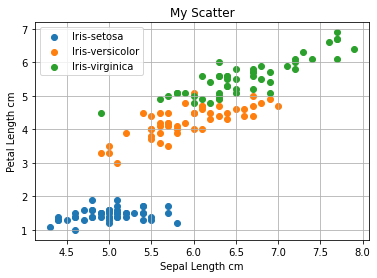

In [10]:
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],label=species[i])

plt.xlabel("Sepal Length cm")
plt.ylabel("Petal Length cm")
plt.legend()
plt.title("My Scatter")
plt.grid()

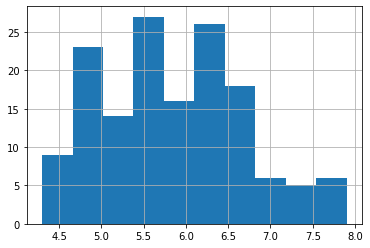

In [11]:
df['SepalLengthCm'].hist()

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

a=[1,0,0,1,0,0,1,0,0,1]
p=[1,0,1,1,0,1,0,1,0,0]

print('Confusion matrix :\n')
print(confusion_matrix(a,p))

print('Classification Report :\n')
print(classification_report(a,p))

Confusion matrix :

[[3 3]
 [2 2]]
Classification Report :

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.40      0.50      0.44         4

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.52      0.50      0.51        10



[0 1 1 0 1 1 1 0 1 0]


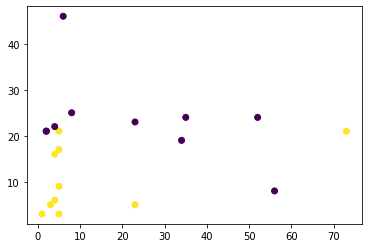

In [13]:
# KNN using self made DB
X=[2,34,52,5,4,8,35,73,5,4]
Y=[21,19,24,17,16,25,24,21,21,22]
c=[0, 0, 0, 1, 1, 0, 0, 1, 1, 0]
plt.scatter(X,Y,c=c)

from sklearn.neighbors import KNeighborsClassifier
data=list(zip(X,Y))
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(data,c)

X_test = [2,3,5,23,4,1,23,56,5,6]
Y_test = [21,5,3,23,6,3,5,8,9,46]
test_data=list(zip(X_test,Y_test))
prediction=knn.predict(test_data)
print(prediction)

plt.scatter(X_test,Y_test,c=prediction)

[0 1 1 0 1 1 1 1 1 0]


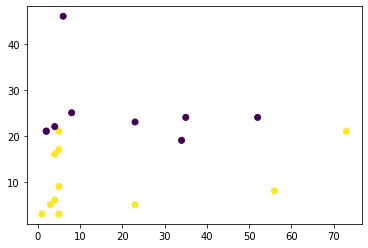

In [14]:
#GaussianNB on selfmade dataset
X=[2,34,52,5,4,8,35,73,5,4]
Y=[21,19,24,17,16,25,24,21,21,22]
c=[0, 0, 0, 1, 1, 0, 0, 1, 1, 0]
plt.scatter(X,Y,c=c)

from sklearn.naive_bayes import GaussianNB
data=list(zip(X,Y))
gnb=GaussianNB()
gnb.fit(data,c)

X_test = [2,3,5,23,4,1,23,56,5,6]
Y_test = [21,5,3,23,6,3,5,8,9,46]
test_data=list(zip(X_test,Y_test))
prediction=gnb.predict(test_data)
print(prediction)

plt.scatter(X_test,Y_test,c=prediction)

In [16]:
df.shape

(150, 6)

In [18]:
# KNN using DB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/Data/Iris.csv")
df.info()

from google.colab import drive
drive.mount('/content/drive')

df.head()

df.describe()

from sklearn.model_selection import train_test_split
# petal length---x->A, species---y->B
A=df.iloc[:,:5]
A.head()

B=df.iloc[:,-1] #-1 for considering last column only
B.head()

from sklearn import preprocessing
A=preprocessing.StandardScaler().fit_transform(A)
A[0:4]
# preprocessing means making all units same 

from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test=train_test_split(A,B,test_size=0.2,random_state=1)
# test size---30% data in test set, 
# random state---har baar run karne pe ek hi value milegi
print(B_test.shape)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(A_train,B_train)
predict1=knn.predict(A_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
acc=accuracy_score(B_test,predict1)
print("Accuracy Score : ")
print(acc)
print("Confusion Matrix : ")
print(confusion_matrix(B_test.values,predict1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(30,)
Accuracy Score : 
1.0
Confusion Matrix : 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [19]:
# GaussianNB using DB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/Data/Iris.csv")
df.info()

from google.colab import drive
drive.mount('/content/drive')

df.head()

df.describe()

from sklearn.model_selection import train_test_split
# petal length---x->A, species---y->B
A=df.iloc[:,:5]
A.head()

B=df.iloc[:,-1] #-1 for considering last column only
B.head()

from sklearn import preprocessing
A=preprocessing.StandardScaler().fit_transform(A)
A[0:4]
# preprocessing means making all units same 

from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test=train_test_split(A,B,test_size=0.2,random_state=1)
# test size---30% data in test set, 
# random state---har baar run karne pe ek hi value milegi
print(B_test.shape)

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(A_train,B_train)
predict2=gnb.predict(A_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("Accuracy score : ")
print(accuracy_score(B_test,predict2))
print("Confusion Matrix : ")
print(confusion_matrix(B_test,predict2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(30,)
Accuracy score : 
1.0
Confusion Matrix : 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


 y = 54.24892138772061 * x + -2242.5538422460377
Mean squared error: 709776908.03
Variance score: 0.20


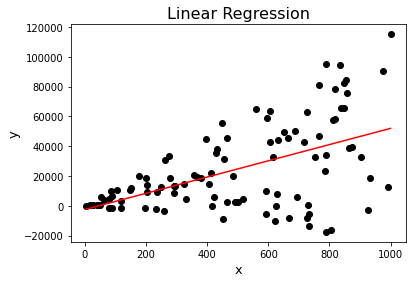

In [20]:
# Linear regression
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import random
def f(x):
    res = x* 25 + 5
    error = res * random.uniform(-2, 4) #(-0.15,0.15)
    # you can try chaning the error to analyse how it affects output
    return res + error
values = []
for i in range(0, 100):
    x = random.uniform(1, 1000)
    y = f(x)
    values.append((x, y))
    regr = linear_model.LinearRegression()
x, y = zip(*values)
#print(x)
#print(y)
max_x = max(x)
min_x = min(x)
train_data_X = list(map(lambda x: [x], list(x[:-20])))
train_data_Y = list(y[:-20])
test_data_X = list(map(lambda x: [x], list(x[-20:])))
test_data_Y = list(y[-20:])
regr.fit(train_data_X, train_data_Y)
m = regr.coef_[0]
b = regr.intercept_
print(' y = {0} * x + {1}'.format(m, b))
plt.scatter(x, y, color='black')  # you can use test_data_X and test_data_Y instead.
plt.plot([min_x, max_x], [b, m*max_x + b], 'r')
plt.title('Linear Regression', fontsize=16)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
print("Mean squared error: %.2f" % np.mean((regr.predict(test_data_X) - test_data_Y) ** 2))
print('Variance score: %.2f' % regr.score(test_data_X, test_data_Y))
     

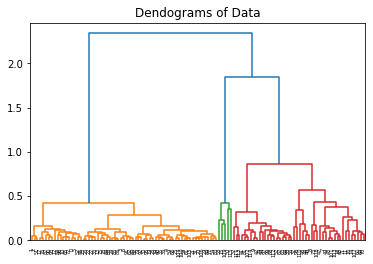

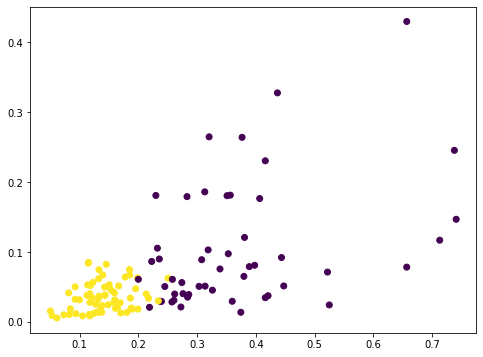

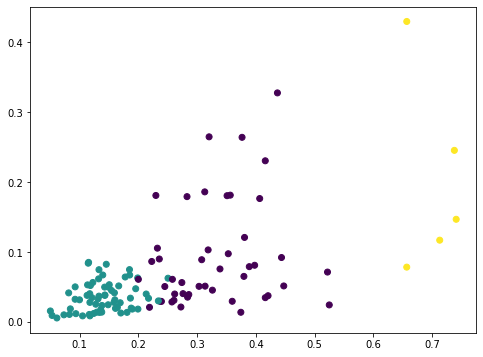

In [29]:
#Agglomerative with dendograms
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Data/dataR2.csv")
data.head()

#normalizing data
from sklearn.preprocessing import normalize
norm_data = normalize(data)
norm_data = pd.DataFrame(norm_data, columns=data.columns)
norm_data.head()

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.title("Dendograms of Data")
dendrogram = shc.dendrogram(shc.linkage(norm_data, method='ward'))

from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
clusters.fit_predict(norm_data)

plt.figure(figsize=(8,6))
plt.scatter(norm_data['Glucose'],norm_data['Leptin'],c=clusters.labels_)

from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
clusters.fit_predict(norm_data)

plt.figure(figsize=(8,6))
plt.scatter(norm_data['Glucose'],norm_data['Leptin'],c=clusters.labels_)


['furnished' 'furnished' 'semi-furnished' 'furnished' 'unfurnished'
 'semi-furnished' 'unfurnished' 'unfurnished' 'semi-furnished'
 'semi-furnished' 'furnished' 'semi-furnished' 'unfurnished'
 'semi-furnished' 'semi-furnished' 'furnished' 'furnished' 'unfurnished'
 'semi-furnished' 'unfurnished' 'semi-furnished' 'unfurnished'
 'semi-furnished' 'unfurnished' 'unfurnished' 'furnished' 'semi-furnished'
 'furnished' 'semi-furnished' 'unfurnished' 'furnished' 'furnished'
 'unfurnished' 'unfurnished' 'furnished' 'furnished' 'semi-furnished'
 'furnished' 'semi-furnished' 'semi-furnished' 'unfurnished'
 'semi-furnished' 'unfurnished' 'unfurnished' 'furnished' 'unfurnished'
 'unfurnished' 'furnished' 'furnished' 'unfurnished' 'semi-furnished'
 'semi-furnished' 'semi-furnished' 'furnished' 'furnished'
 'semi-furnished' 'semi-furnished' 'unfurnished' 'semi-furnished'
 'furnished' 'unfurnished' 'unfurnished' 'furnished' 'semi-furnished'
 'semi-furnished' 'furnished' 'semi-furnished' 'unfurnished'


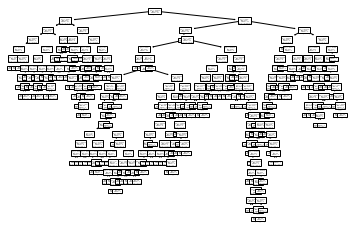

In [39]:
#Decision tree
import pandas as pd
import graphviz
data = pd.read_csv("/content/drive/MyDrive/Data/Housing.csv")
data.head()

from sklearn.model_selection import train_test_split
x= data[['price', 'area', 'bedrooms']].values
y= data[['furnishingstatus']].values

x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

from sklearn import tree
from sklearn.model_selection import train_test_split
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

predicted_value = model.predict(x_test)
print(predicted_value)

tree.plot_tree(model)

from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_value))

# import matplotlib.pyplot as plt
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=150)
# tree.plot_tree(model,filled = True);
# fig.savefig('imagename.png')

# dot_data = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data)   
# graph

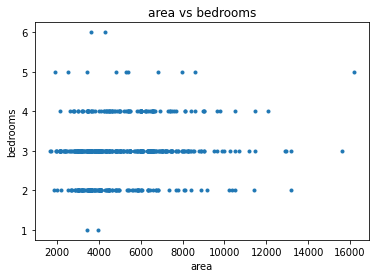

[0.8497006  1.15397587]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


array([[ 1.7325146 , -0.25222009],
       [ 2.23476069,  0.25002601],
       [ 1.60195799,  1.53509636],
       ...,
       [-1.424667  ,  0.42634443],
       [-0.69728549, -0.76414712],
       [-0.39071969, -0.45758132]])

In [32]:
#PCA
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/Data/Housing.csv")
dataset.head()

a1 = dataset["area"]
a2 = dataset["bedrooms"]
import matplotlib.pyplot as plt
plt.title("area vs bedrooms")
plt.xlabel("area")
plt.ylabel("bedrooms")
plt.plot(a1,a2,'.')
plt.show()

import numpy as np
std1 = (a1-np.mean(a1))/np.std(a1)
std2 = (a2-np.mean(a2))/np.std(a2)
std3 = np.array([std1.T, std2.T])

covariance = np.cov(np.array([std1,std2]))

from numpy import linalg as LA
eigen_val, eigen_vectors = LA.eig(covariance)
print(eigen_val)
print(eigen_vectors)

new_feature = np.matmul(std3.T, eigen_vectors[1:].T)
new_feature[:5 :]

from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
decomposed_pcs = pca.fit_transform(std3.T)
decomposed_pcs[:5, :]

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
decomposed_pcs = pca.fit_transform(std3.T)
decomposed_pcs